# Classification with Gradient Boosting on Titanic Data

### 1. Predicting Survived
##### 1.1 Import the data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

np.random.seed(12356)
df = pd.read_csv('titanic.csv')

# Drop all the missing values NA
df = df.dropna()

##### 1.2 Assign input and output variabble

In [2]:
# Assign input variables
X = df.loc[:,['Pclass','Sex','Age','Fare','Embarked','SibSp','Parch']]

# Assign target variable
y = df['Survived']

##### 1.3 Handle some missing and fix variables types

In [3]:
# Replace missing values by the median
X["Age"] = X["Age"].fillna(X["Age"].median())

# Impute the Embarked variable
X["Embarked"] = X["Embarked"].fillna("S")
# Change Pclass to categorical variable
X['Pclass'] = X['Pclass'].astype(object)

##### 1.4 Encode categorical variable

In [4]:
X = pd.get_dummies(X)

##### 1.5 Split the data

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

##### 1.6 Setup and Train a gradient Boosting

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
r1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1)
r1.fit(x_train, y_train)
# Accuracry on test data
print("Testing Accuracy: ", r1.score(x_test, y_test))

Testing Accuracy:  0.8727272727272727


### Variable Importance

<AxesSubplot:ylabel='Variables'>

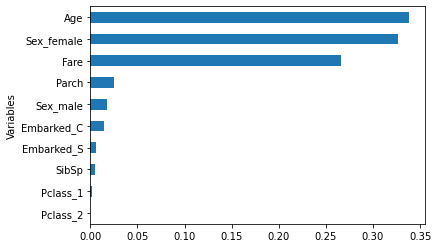

In [7]:
import warnings
warnings.filterwarnings('ignore')

sorted_idx = (-r1.feature_importances_).argsort()

feature_importance = pd.DataFrame({'Variables':x_train.columns[sorted_idx], 'Importance':r1.feature_importances_[sorted_idx]})
df = feature_importance[:10]
df.sort_values('Importance',inplace=True)

df.plot(kind='barh',y='Importance',x='Variables', legend=False)

### Learning Rate

Text(0.5, 1.1, 'Learning fast vs. Learning slow')

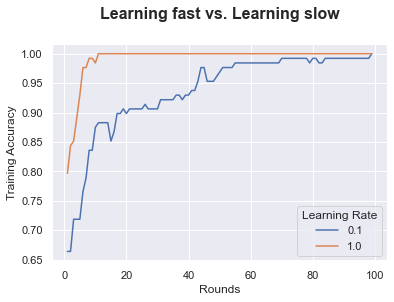

In [8]:
# Plot the Training Accuracy of gradient boosting with n_estimators running from n1 to n2 
# and two learning rates l1 and l2. 

n1 = 1
n2 = 100
l1 = .1
l2 = 1

ac = pd.DataFrame([], columns=list(['Rounds','Learning Rate','Accuracy']))
from sklearn.tree import DecisionTreeClassifier
for rs in range(n1, n2):
    for lr in [l1, l2]:
        boost = GradientBoostingClassifier(n_estimators=rs, learning_rate=lr)
        boost.fit(x_train,y_train)
        ac = ac.append(pd.DataFrame([[rs, lr, boost.score(x_train,y_train) ]], 
                                    columns=list(['Rounds','Learning Rate','Training Accuracy'])), 
                       ignore_index=True)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Rounds", y="Training Accuracy", 
                  hue =ac['Learning Rate'].astype('category'),data=ac)
ax.text(x=0.5, y=1.1, s='Learning fast vs. Learning slow', 
        fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)

Text(0.5, 1.1, 'Learning fast vs. Learning slow')

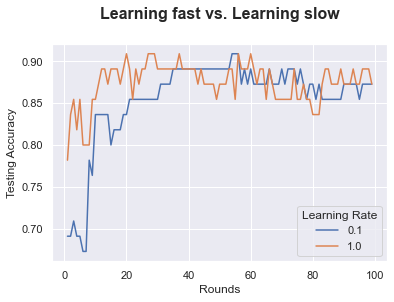

In [9]:
# Plot the Testing Accuracy of gradient boosting with n_estimators running from n1 to n2 
# and two learning rates l1 and l2. 

n1 = 1
n2 = 100
l1 = .1
l2 = 1

ac = pd.DataFrame([], columns=list(['Rounds','Learning Rate','Accuracy']))
from sklearn.tree import DecisionTreeClassifier
for rs in range(n1, n2):
    for lr in [l1, l2]:
        boost = GradientBoostingClassifier(n_estimators=rs, learning_rate=lr)
        boost.fit(x_train,y_train)
        ac = ac.append(pd.DataFrame([[rs, lr, boost.score(x_test,y_test) ]], 
                                    columns=list(['Rounds','Learning Rate','Testing Accuracy'])), 
                       ignore_index=True)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Rounds", y="Testing Accuracy", hue =ac['Learning Rate'].astype('category'),data=ac)
ax.text(x=0.5, y=1.1, s='Learning fast vs. Learning slow', 
        fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)

### 2. Practice

Predicting Breast Cancer.

1. Import the breast cancer dataset. The data can be downloaded at this [link](https://bryantstats.github.io/math460/python/breast_cancer.csv)

2. Set the input (X) and output (y) (Use `df.columns` to see all the columns to easier copy/paste). Split the data into 60% training and 40% testing

3. Train a gradient boosting model with 200 n_estimators and .1 learning rare. What is testing accuracy of the gradient boosting?

4. What is the most important variable according to the above gradient boosting model in predicting breast cancer?

5. Find a gradient boosting (try a few different of `n_estimators` and `learning_rate`) that have a higher testing accuracy than the above gradient boosting. What is the n_estimators and learning of this gradient boosting? 